# Cartopy Tutorial

##### Author:
* Lorenz Marten
* Christoph Schroeer

Cartopy is a python module for plotting maps. It is used in combination with matplotlib.

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

# zoomabel maps
%matplotlib notebook

## Basic Maps
To use __[cartopy](https://scitools.org.uk/cartopy/docs/latest/#)__ with matplotlib, you need to create a __[GeoAxes](https://scitools.org.uk/cartopy/docs/latest/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes)__ instance, which represents a map projection. This can then be used to add elements (like coastlines or a background image) to your map. A list of cartopy projections can be found __[here](https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#cartopy-projections)__.

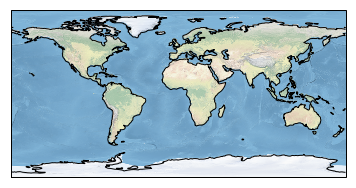

In [2]:
plt.figure()

proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines()
ax.background_img()

plt.show()

## Saving the Map
To save the map, use the `plt.savefig()` function.

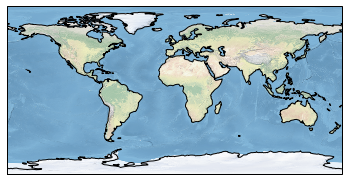

In [3]:
plt.figure()
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.coastlines()
ax.background_img()

# Saving the map
plt.savefig('example.png',format='png')

plt.show()

## Adding more details
The cartopy __[features interface](https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html)__ allows you to add external data. A good source for map data is __[Natural Earth Data](https://www.naturalearthdata.com/)__. There you can find and download data in three different resolutions (110m, 50m and 10m). The cartopy features interface even allows to download directly from there. Some often needed features like borders, land, oceans and the like in 110m resolution are especially simple to add.

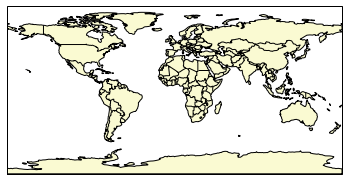

In [4]:
import cartopy.feature as cfeature

plt.figure()
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Add land areas
ax.add_feature(cfeature.LAND,edgecolor='k',facecolor='lightgoldenrodyellow')
# Add borders
ax.add_feature(cfeature.BORDERS,edgecolor='k',facecolor='none')

plt.show()

## Higher resolutions and other features
Other features and resolutions are also easy to use. To demonstrate this we make a map of germany with 10m resolution. We get the data by using `cartopy.feature.NaturalEarthFeature()`. The first three arguments define which file to get. You can get all files you can find on Natural Earth Data in the download section. The other arguments define how this feature is plotted and can also be used in the `add_feature()` statement.

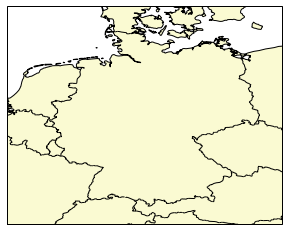

In [5]:
plt.figure()
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)

# Set borders of plotted area in koordinates: [east, west, south, north]
ax.set_extent([4, 16, 46.5, 56],proj)

# Getting 10m data from NaturalEarthData
land = cfeature.NaturalEarthFeature('physical','land','10m',
            edgecolor='k',facecolor='lightgoldenrodyellow',)
borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land','10m',
            edgecolor='k',facecolor='none')

# Plotting the data
ax.add_feature(land)
ax.add_feature(borders)

plt.show()

## Use specific parts of a shapefile
It is possible to plot only data corresponding to some keywords. We now add federal states, but only in germany. To do so we have to get the shapefile and open it with the cartopy __[shapereader](https://scitools.org.uk/cartopy/docs/v0.15/tutorials/using_the_shapereader.html)__. Then we iterate over all records in it and plot only those belonging to germany.


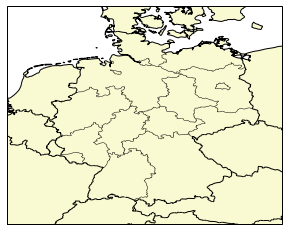

In [6]:
import cartopy.io.shapereader as shpr

plt.figure()
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.set_extent([4, 16, 46.5, 56],proj)
land = cfeature.NaturalEarthFeature('physical','land','10m',
            edgecolor='k',facecolor='lightgoldenrodyellow',)
borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land','10m',
            edgecolor='k',facecolor='none')
ax.add_feature(land)
ax.add_feature(borders)

# Getting the shapefile
fname = shpr.natural_earth(resolution='10m',category='cultural',name='admin_1_states_provinces_lines')

# Reading the shapefile
provinces = shpr.Reader(fname).records()

# Iterating over all records and plotting
for prov in provinces:
    if prov.attributes['adm0_a3'] == 'DEU':
        ax.add_geometries(prov.geometry,proj,
                          edgecolor='k',facecolor='none',linewidth=0.5)

plt.show()

## Plotting Great Circles and labeling points
We want to plot the great circle between the epicenter of the Mw 9.1 Tohoku Earthquake and Hamburg. To do so we use `plt.plot()` to plot a line between them and use the `transform` argument to define a geodetic transformation. 

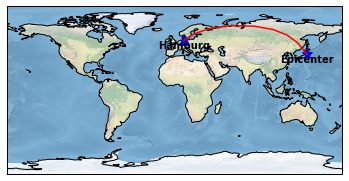

In [7]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.background_img()

# Koordinates of epicenter and Hamburg
lon_epi,lat_epi = 142.5,38.3
lon_hh,lat_hh = 10.0,53.5
lons,lats = [lon_epi,lon_hh],[lat_epi,lat_hh]

# Plotting the points
ax.plot(lon_epi,lat_epi,'*b',transform=ccrs.PlateCarree(),markersize=10)
ax.plot(lon_hh,lat_hh,'^b',transform=ccrs.PlateCarree(),markersize=10)

# Plotting the great circle
ax.plot(lons,lats,'r',transform=ccrs.Geodetic())

# Labeling points
ax.annotate('Epicenter',(lon_epi,lat_epi),transform=ccrs.PlateCarree(),
        ha='center',va='top',weight='bold')
ax.annotate('Hamburg',(lon_hh,lat_hh),transform=ccrs.PlateCarree(),
        ha='center',va='top',weight='bold')

plt.show()

## Changing plot resolutions
Due to the fact, that the standard resolution for most projections is low, things like great circles tend to look worse, the smaller the maps extension is. To resolve this issue, we can manually set the parameter responsible for this behaviour to a lower value.

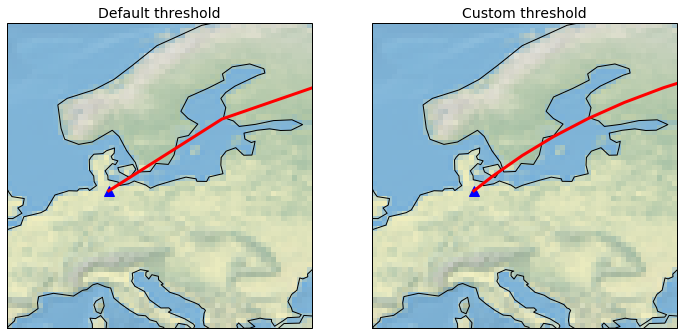

In [8]:


plt.figure(figsize=(12,8))

lon_epi,lat_epi = 142.5,38.3
lon_hh,lat_hh = 10.0,53.5
lons,lats = [lon_epi,lon_hh],[lat_epi,lat_hh]


# Left plot, square great circle
proj = ccrs.PlateCarree()
ax1 = plt.subplot(1,2,1,projection=proj)
ax1.set_extent([0, 30, 40, 70],proj)
ax1.coastlines()
ax1.background_img()

ax1.plot(lon_epi,lat_epi,'*b',transform=proj,markersize=10)
ax1.plot(lon_hh,lat_hh,'^b',transform=proj,markersize=10)
ax1.plot(lons,lats,'r',transform=ccrs.Geodetic(), linewidth=3)
ax1.set_title("Default threshold", fontsize=14)



# Right plot, smoothed great circle
proj = ccrs.PlateCarree()

# Lowering the threshold to smoothen interpolation
proj._threshold = 0.03

ax2 = plt.subplot(1,2,2,projection=proj)
ax2.set_extent([0, 30, 40, 70],proj)
ax2.coastlines()
ax2.background_img()

ax2.plot(lon_epi,lat_epi,'*b',transform=proj,markersize=10)
ax2.plot(lon_hh,lat_hh,'^b',transform=proj,markersize=10)
ax2.plot(lons,lats,'r',transform=ccrs.Geodetic(), linewidth=3)
ax2.set_title("Custom threshold", fontsize=14)


plt.show()



## Plotting areas between two lines
Plotting areas on maps can be helpful to better illustrate regions of interest, i.e the area between two great circles originating from the same point or certain lon/latitudes. In order to do so we utilize the fill_between function as well as its counterpart fill_betweenx.

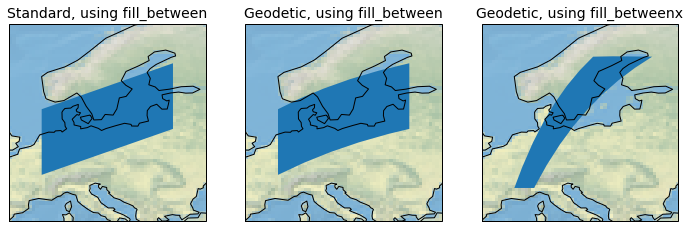

In [9]:

plt.figure(figsize=(12,8))
proj = ccrs.PlateCarree()
proj._threshold=0.03


# Left plot, standard usage of fill_between.
ax1 = plt.subplot(1,3,1,projection=proj)
ax1.set_extent([0, 30, 40, 70],proj)
ax1.coastlines()
ax1.background_img()

# The fill_between function creates an area between two lines both of which share the same x-coordinates
#  but have differing y-coordinates
ax1.fill_between(x=[5,25], y1=[47,54], y2=[57,64], transform=proj)
ax1.set_title("Standard, using fill_between", fontsize=14)



# Middle plot, using a geodetic projection for fill_between
ax2 = plt.subplot(1,3,2,projection=proj)
ax2.set_extent([0, 30, 40, 70],proj)
ax2.coastlines()
ax2.background_img()

# Using a geodetic projection leads to both lines, which define the area, to follow great circles.
ax2.fill_between(x=[5,25], y1=[47,54], y2=[57,64], transform=ccrs.Geodetic())
ax2.set_title("Geodetic, using fill_between", fontsize=14)



# Right plot, using fill_betweenx with a geodetic projection
ax3 = plt.subplot(1,3,3,projection=proj)
ax3.set_extent([0, 30, 40, 70],proj)
ax3.coastlines()
ax3.background_img()

# Using the fill_betweenx function changes the common coordinates of both lines to be the y-coordinates.
ax3.fill_betweenx(y=[45,65], x1=[8,26], x2=[5,17], transform=ccrs.Geodetic())
ax3.set_title("Geodetic, using fill_betweenx", fontsize=14)


plt.show()



## Overview Map
Sometimes its needed to show which area of the world your map shows. To do so in the same map, you can add a second GeoAxes to your plot. The first argument in `plt.axes()` gives the position and size (\[left, bottom, width, height\])of the new map. This second map is completly independent from the main map. To plot the geometry of the main map into the second map, we need to import `shapely.geometry`.

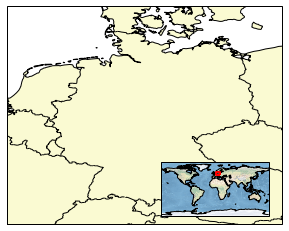

In [10]:
import shapely.geometry as sgeom

plt.figure()
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ext = [4, 16, 46.5, 56]
ax.set_extent(ext,proj)
land = cfeature.NaturalEarthFeature('physical','land','10m',
            edgecolor='k',facecolor='lightgoldenrodyellow',)
borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land','10m',
            edgecolor='k',facecolor='none')
ax.add_feature(land)
ax.add_feature(borders)

# Add second GeoAxes instance
sub_ax = plt.axes([0.55,0.12,0.25,0.25], projection=proj)
# Add coastlines and background
sub_ax.coastlines()
sub_ax.background_img()
# Plot box with position of main map
extent_box = sgeom.box(ext[0],ext[2],ext[1],ext[3])
sub_ax.add_geometries([extent_box], proj, color='none',
                      edgecolor='r', linewidth=2)

plt.show()

## Adding a scale bar
There is currently (Oct 2018) no cartopy function to plot a scale bar. Thankfully stackoverflow user "mephistolotl" wrote a __[module](https://stackoverflow.com/a/50674451)__ which solves this problem. You can find it in the additional file `scalebar.py` and import it into your code.

In [4]:
from scalebar import scale_bar
import matplotlib.pyplot as plt

plt.figure()
proj = ccrs.PlateCarree()
ax = plt.axes(projection=proj)
ax.set_extent([4, 16, 46.5, 56],proj)
land = cfeature.NaturalEarthFeature('physical','land','10m',
            edgecolor='k',facecolor='lightgoldenrodyellow',)
borders = cfeature.NaturalEarthFeature('cultural', 'admin_0_boundary_lines_land','10m',
            edgecolor='k',facecolor='none')
ax.add_feature(land)
ax.add_feature(borders)

# Adding the scale bar
scale_bar(ax,(0.75,0.05),200)

plt.show()

NameError: name 'ccrs' is not defined

<Figure size 432x288 with 0 Axes>

## Modifying the axes

If you want to have gridlines and modify them in any way, use ax.gridlines. That way, you can make the labelas appear at any edge of the map. You can also cange the style of the label. For setting ticks, you can do it manually with the ticker from matplotlib. To add labels, you unfortunately have to add textcells manually. __[for more, see here](https://scitools.org.uk/cartopy/docs/v0.13/matplotlib/gridliner.html)__

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs



ax = plt.axes(projection=ccrs.PlateCarree())

ax.stock_img()
ax.coastlines(resolution='50m')

ax.set_extent([-40,60,30,70], ccrs.PlateCarree())
ax.text(-0.1, 0.55, 'Latitude [°]', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize = 15)
ax.text(0.5, -0.25, 'Longitude [°]', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=15)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = False
gl.xlocator = mticker.FixedLocator([ -30,-15, 0,15,30, 45,70]) # make sure,
# that the hoghest and lowest ticks are not on the map. Otherwise, the gridlines won't be drawn everywhere,
# as you can see on the left side of the plot
gl.xlabel_style = {'size': 15, 'color': 'gray'}
gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

plt.show()

ImportError: libgfortran.so.1: cannot open shared object file: No such file or directory

<Figure size 432x288 with 0 Axes>